<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>


<h2 style="text-align: center;"><b>Семинар 7. Многослойная сеть на PyTorch</b></h3>

В этом ноутбке мы научимся писать свои нейросети на фреймворке PyTorch, конкретно - рассмотрим, как написать многослойную полносвязную сеть (Fully-Connected, FC), и сравним их качество на датасете картинок MNIST.

<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

<h3 style="text-align: center;"><b>Многослойная нейронная сеть</b></h3>

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Каждый слой состоит из **нейронов**. Ранее мы уже писали свой нейрон на NumPy, вот из таких нейронов и состоит ***MLP (Multi-Layer Perceptron)***. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть у нейронов со слоя $L_{i-1}$  и нейронов $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** на **выходном слое** обычно один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае ***задачи классификации*** на **выходном слое** обычно один нейрон, если задача бинарной классификации, и $K$ нейронов, если задача $K$-класовой классификации.

#### Forward pass в MLP

Каждый слой многослойной нейросети - это матрица весов, строки которой - это нейроны (одна строка - один нейрон), а столбцы - веса каждого нейрона (то есть одна строка - это веса одного нейрона).

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix} 
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM} 
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1} 
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, у второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2} 
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix} 
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK} 
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге ***для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации***.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации).

**Backward pass в MLP**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch

## Датасет
Мы будем работать с датасетом "Игрушка дьявола". Генерация и отрисовка датасета:

In [2]:
# код для генерации взят из Стэнфордсокго курса:
# http://cs231n.github.io/neural-networks-case-study/#linear

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

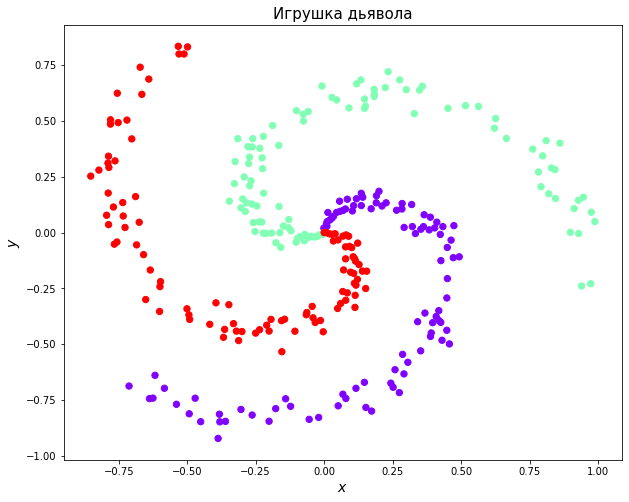

In [3]:
# Отрисовочная магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

<h3 style="text-align: center;"><b>Многослойная нейросеть на PyTorch</b></h3>

Ешё раз напомним про основные компоненты нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количетсво итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

## PyTorch для нейронных сетей

Основная абстракция для построения нейронной сети --- это torch.nn.Module. Module --- это те кирпичики, из которых мы будем складывать любую нейронную сеть. Как мы узнали на лекции, для определения модуля достаточно задать методы Forward и Backward. Базовый класс для nn.Module в PyTorch:



In [4]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.
    


### Модуль Sequential

Основной класс в PyTorch для работы с нейронными сетями --- это  Sequential.  Sequential --- это шаблон для самой простой последовательной нейронной сети. Методы Forward и Backward заданы соответственно: мы пробрасываем выходы и градиенты через все слои, из которых состоит Module. Посмотрим, как это работает.

Не будем медлить - бахнем 100 нейронов в двуслойную нейросеть. 

In [5]:
# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 2, 100, 3

# Use the nn package to define our model and loss function.
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Посмотрим, что у нас получилось. Пропустим мусорные данные через нашу модель методом forward.

In [6]:
print("Weight shapes:", [w.shape for w in two_layer_net.parameters()])

Weight shapes: [torch.Size([100, 2]), torch.Size([100]), torch.Size([3, 100]), torch.Size([3])]


In [13]:
X.shape

(300, 2)

In [11]:
y.shape

(300,)

In [14]:
# create dummy data with 3 samples and 784 features
x_batch = torch.tensor(X[:3], dtype=torch.float32)
y_batch = torch.tensor(y[:3], dtype=torch.float32)

# compute outputs given inputs, both are variables
y_predicted = two_layer_net(x_batch)[0]

y_predicted  # display what we've got

C:\Users\unikum\Anaconda3\lib\site-packages\torch\nn\modules\container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([0.4323, 0.2750, 0.2926], grad_fn=<SelectBackward>)

In [16]:
two_layer_net(x_batch)

tensor([[0.4323, 0.2750, 0.2926],
        [0.4322, 0.2754, 0.2924],
        [0.4320, 0.2755, 0.2925]], grad_fn=<SoftmaxBackward>)

In [17]:
x_batch

tensor([[ 0.0000,  0.0000],
        [ 0.0018,  0.0099],
        [-0.0010,  0.0202]])

## Код для генерации мини-батчей



In [22]:
X.shape[0]

300

In [24]:
np.random.randint(X.shape[0], size=128)

array([146, 149,  78, 237, 182, 114,  59, 211,  38,  90, 288,  69,  37,
       138, 265,  15,  86,  70, 299, 102, 102,  86,   5, 162,  54,  76,
        23,  80, 240, 198,  11, 279, 254, 141,  73, 121, 181, 276, 217,
       100,  12, 222, 240, 216, 205,  86, 181, 278,  51, 178, 143, 272,
        75, 139, 218, 264,  49,  77,  62, 211, 149,  54, 119,   0,  26,
       201, 168,  64, 272, 295,  84,  62,  26, 295,  70,  29, 115, 213,
        34, 253, 133, 228,   3, 146, 119, 143, 241,  54, 237, 120,  14,
       293, 254, 118, 274, 266, 255, 172, 178, 188,  98,   2, 187, 125,
        14, 284, 127,  13, 129, 122,   5, 154,  77, 168, 228, 169, 266,
        30, 266, 151,  41,  63, 144,  46, 268,  46, 285, 111])

In [18]:
from torch.autograd import Variable

In [19]:
def batch_gen(X, y, batch_size=128):
    idx = np.random.randint(X.shape[0], size=batch_size)
    X_batch = X[idx]
    y_batch = y[idx]
  
    return Variable(torch.FloatTensor(X_batch)), Variable(torch.LongTensor(y_batch))

In [25]:
batch_gen(X, y)

(tensor([[-2.6679e-01,  2.3197e-01],
         [-7.1226e-01, -6.8745e-01],
         [-4.0390e-02, -3.8171e-01],
         [ 5.0802e-02, -3.3050e-02],
         [ 7.8158e-02, -6.3988e-02],
         [ 1.9377e-02, -5.7153e-03],
         [-4.1757e-01, -4.1093e-01],
         [ 1.4112e-01,  1.5837e-01],
         [-3.2546e-02, -4.0273e-01],
         [-3.9497e-01, -3.1476e-01],
         [ 8.4494e-01,  1.5248e-01],
         [ 8.0110e-02, -1.0599e-02],
         [ 8.4494e-01,  1.5248e-01],
         [ 1.9377e-02, -5.7153e-03],
         [-4.9371e-01, -3.6866e-01],
         [-6.5929e-01, -9.8896e-02],
         [-7.8707e-01,  3.5651e-02],
         [ 3.4131e-01, -3.9924e-01],
         [-2.7825e-01,  3.8466e-01],
         [-6.7170e-01,  7.4083e-01],
         [ 1.3560e-01,  1.7605e-01],
         [-7.5641e-02,  4.9935e-01],
         [ 7.9194e-01,  2.0557e-01],
         [-1.5439e-01, -5.3367e-01],
         [-6.4015e-01,  6.8751e-01],
         [ 9.2814e-01,  1.4495e-01],
         [-2.5248e-01,  4.7900e-03],
 

In [20]:
batch_gen(X, y)[1].shape

torch.Size([128])

In [28]:
two_layer_net.forward(batch_gen(X,y)[0])

tensor([[0.4368, 0.2656, 0.2976],
        [0.4424, 0.2925, 0.2651],
        [0.4312, 0.2334, 0.3354],
        [0.4306, 0.2320, 0.3374],
        [0.4298, 0.2353, 0.3349],
        [0.4325, 0.3080, 0.2594],
        [0.4279, 0.3052, 0.2669],
        [0.4315, 0.2931, 0.2754],
        [0.4174, 0.3330, 0.2496],
        [0.4356, 0.2802, 0.2841],
        [0.4322, 0.2982, 0.2696],
        [0.4315, 0.2931, 0.2754],
        [0.4348, 0.2806, 0.2846],
        [0.4322, 0.2764, 0.2914],
        [0.4318, 0.2944, 0.2738],
        [0.4336, 0.3079, 0.2585],
        [0.4320, 0.2737, 0.2943],
        [0.4135, 0.3468, 0.2397],
        [0.4336, 0.3079, 0.2585],
        [0.4315, 0.3098, 0.2586],
        [0.4314, 0.2326, 0.3360],
        [0.4332, 0.2843, 0.2825],
        [0.4286, 0.2624, 0.3090],
        [0.4322, 0.3031, 0.2647],
        [0.4348, 0.2634, 0.3018],
        [0.4281, 0.2331, 0.3388],
        [0.4262, 0.2608, 0.3130],
        [0.4264, 0.2675, 0.3061],
        [0.4281, 0.2331, 0.3388],
        [0.433

Не забываем оборачивать данные (без этого градиенты не посчитать):

## Функция потерь и оптимизатор

In [29]:
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate)

C:\Users\unikum\Anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


## Обучение модели

In [30]:
# пример взят из официального туториала: 
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
for t in range(10000):
    x_batch, y_batch = batch_gen(X, y)
    
    # forward
    y_pred = two_layer_net(x_batch)

    # loss
    loss = loss_fn(y_pred, y_batch)
    print('{} {}'.format(t, loss.data))

    # ЗАНУЛЯЕМ!
    optimizer.zero_grad()

    # backward
    loss.backward()

    # ОБНОВЛЯЕМ! 
    optimizer.step()

0 138.8939666748047
1 140.41043090820312
2 139.15377807617188
3 139.5426788330078
4 139.16184997558594
5 138.69532775878906
6 139.01905822753906
7 140.64112854003906
8 139.04986572265625
9 138.20361328125
10 139.4506072998047
11 139.4105987548828
12 139.07554626464844
13 137.4506072998047
14 138.69644165039062
15 139.91604614257812
16 138.99441528320312
17 137.84524536132812
18 137.1769256591797
19 138.53164672851562
20 138.47293090820312
21 136.85389709472656
22 138.04771423339844
23 138.82205200195312
24 138.56727600097656
25 138.6836395263672
26 138.8024444580078
27 138.39566040039062
28 137.600830078125
29 137.5334014892578
30 137.87631225585938
31 138.80210876464844
32 136.7390594482422
33 138.4993133544922
34 137.68658447265625
35 136.42259216308594
36 137.4773712158203
37 137.16952514648438
38 136.70391845703125
39 138.4175567626953
40 137.45852661132812
41 137.0509490966797
42 136.57579040527344
43 136.85211181640625
44 136.39743041992188
45 136.63404846191406
46 136.9784545898

470 125.90252685546875
471 124.14667510986328
472 127.29570007324219
473 126.23472595214844
474 124.93094635009766
475 125.42593383789062
476 125.21341705322266
477 127.58123779296875
478 126.05329132080078
479 124.7542495727539
480 124.71752166748047
481 124.7226333618164
482 125.65953063964844
483 124.23456573486328
484 123.15193939208984
485 124.11661529541016
486 127.23013305664062
487 125.33975982666016
488 125.64485168457031
489 126.90333557128906
490 125.81857299804688
491 127.7896957397461
492 123.8263168334961
493 125.40804290771484
494 126.22284698486328
495 124.8105697631836
496 127.74630737304688
497 124.8967056274414
498 124.70283508300781
499 122.8706283569336
500 126.79444885253906
501 123.90081024169922
502 126.40885162353516
503 121.96687316894531
504 123.1346435546875
505 123.66378021240234
506 124.77115631103516
507 124.26698303222656
508 127.73287963867188
509 126.66280364990234
510 124.32857513427734
511 122.5006332397461
512 121.90242767333984
513 125.368003845214

846 123.45759582519531
847 123.040771484375
848 123.76915740966797
849 121.20660400390625
850 122.35247039794922
851 121.3219985961914
852 119.05376434326172
853 127.41962432861328
854 123.5718002319336
855 119.64164733886719
856 118.52406311035156
857 119.49629974365234
858 121.1895751953125
859 122.4981689453125
860 119.36860656738281
861 123.75969696044922
862 123.8100357055664
863 122.1109848022461
864 122.63726806640625
865 120.91759490966797
866 118.75057983398438
867 121.73870086669922
868 118.2035903930664
869 122.72525787353516
870 121.82181549072266
871 122.82099151611328
872 120.41323852539062
873 120.3537826538086
874 119.82221221923828
875 123.26564025878906
876 121.63156127929688
877 120.21862030029297
878 120.49664306640625
879 123.17382049560547
880 126.77299499511719
881 126.04419708251953
882 123.7094497680664
883 122.49417114257812
884 119.81481170654297
885 117.5135498046875
886 121.1748046875
887 120.30638122558594
888 124.75130462646484
889 117.98745727539062
890 

1216 122.75010681152344
1217 119.84783172607422
1218 120.43378448486328
1219 119.43387603759766
1220 120.33876037597656
1221 119.76744842529297
1222 120.35685729980469
1223 124.5203857421875
1224 121.47943878173828
1225 119.12828063964844
1226 116.47846984863281
1227 122.33843231201172
1228 120.471923828125
1229 122.6220932006836
1230 121.6492919921875
1231 119.85051727294922
1232 119.23700714111328
1233 117.5838623046875
1234 117.70675659179688
1235 115.74927520751953
1236 117.45191955566406
1237 124.32382202148438
1238 121.82679748535156
1239 122.0214614868164
1240 120.15145111083984
1241 119.58500671386719
1242 124.3387451171875
1243 117.70310974121094
1244 119.76026153564453
1245 119.73299407958984
1246 123.61148834228516
1247 119.38158416748047
1248 121.29356384277344
1249 119.14556121826172
1250 120.70526885986328
1251 118.6617202758789
1252 119.95155334472656
1253 119.58544158935547
1254 121.01961517333984
1255 118.52262878417969
1256 118.59406280517578
1257 116.1082534790039
12

1595 115.33170318603516
1596 113.86105346679688
1597 124.58792877197266
1598 120.23273468017578
1599 118.3190689086914
1600 119.1609878540039
1601 116.59849548339844
1602 117.79804992675781
1603 115.75643157958984
1604 114.9771728515625
1605 114.87614440917969
1606 122.44075012207031
1607 117.88841247558594
1608 118.32881927490234
1609 118.42220306396484
1610 116.62828063964844
1611 120.51669311523438
1612 121.5538558959961
1613 120.2114486694336
1614 114.46240234375
1615 118.6358871459961
1616 119.44242095947266
1617 119.43624114990234
1618 115.56269073486328
1619 124.56722259521484
1620 119.7581787109375
1621 123.9097900390625
1622 117.94097900390625
1623 113.52857208251953
1624 116.46161651611328
1625 122.45531463623047
1626 116.38758850097656
1627 120.75588989257812
1628 114.54808044433594
1629 120.02108001708984
1630 117.87178802490234
1631 118.25871276855469
1632 112.7948226928711
1633 121.41398620605469
1634 115.19298553466797
1635 112.90067291259766
1636 115.7287368774414
1637 

1980 121.16778564453125
1981 119.1296157836914
1982 118.55741882324219
1983 117.79943084716797
1984 116.51934051513672
1985 119.22179412841797
1986 118.14872741699219
1987 118.11474609375
1988 116.7381362915039
1989 115.93811798095703
1990 118.99703216552734
1991 117.7122573852539
1992 117.62889099121094
1993 115.83089447021484
1994 117.90897369384766
1995 116.69136047363281
1996 114.90544128417969
1997 118.05081939697266
1998 116.92269134521484
1999 115.30818176269531
2000 119.75772094726562
2001 120.77217102050781
2002 119.7110366821289
2003 117.20702362060547
2004 117.03031921386719
2005 120.332275390625
2006 116.77869415283203
2007 118.78333282470703
2008 118.41192626953125
2009 116.66496276855469
2010 120.67832946777344
2011 116.27720642089844
2012 122.27719116210938
2013 114.49959564208984
2014 118.24469757080078
2015 113.24740600585938
2016 116.45903015136719
2017 116.1337661743164
2018 121.44705963134766
2019 120.50413513183594
2020 116.84687805175781
2021 117.30175018310547
20

2336 118.62789154052734
2337 114.65300750732422
2338 115.14608001708984
2339 113.1092529296875
2340 118.39498138427734
2341 123.96869659423828
2342 114.08238220214844
2343 115.85450744628906
2344 114.44910430908203
2345 120.42587280273438
2346 121.35047912597656
2347 117.82624816894531
2348 116.33763122558594
2349 117.30625915527344
2350 121.61980438232422
2351 119.43226623535156
2352 120.48026275634766
2353 116.44984436035156
2354 113.86437225341797
2355 117.83123016357422
2356 118.57272338867188
2357 118.08889770507812
2358 121.5412368774414
2359 114.64674377441406
2360 112.3783950805664
2361 113.17106628417969
2362 118.93077087402344
2363 119.87374877929688
2364 118.56697082519531
2365 115.71139526367188
2366 116.4139175415039
2367 115.55835723876953
2368 114.0160903930664
2369 114.09707641601562
2370 120.6220474243164
2371 113.2838363647461
2372 118.50859069824219
2373 118.51380157470703
2374 117.42293548583984
2375 119.07748413085938
2376 119.58382415771484
2377 121.69146728515625

2713 115.12004089355469
2714 115.04563903808594
2715 113.586669921875
2716 115.24486541748047
2717 118.33583068847656
2718 117.45752716064453
2719 125.26515197753906
2720 117.82334899902344
2721 115.94017028808594
2722 115.28316497802734
2723 111.91740417480469
2724 116.0767822265625
2725 118.47286224365234
2726 114.3686752319336
2727 117.86210632324219
2728 110.24878692626953
2729 120.36083984375
2730 118.13198852539062
2731 114.2799072265625
2732 114.18388366699219
2733 110.69833374023438
2734 115.24931335449219
2735 115.95394134521484
2736 117.63211822509766
2737 114.43389129638672
2738 119.88550567626953
2739 111.39434051513672
2740 118.64997863769531
2741 115.59624481201172
2742 121.96247863769531
2743 118.39888763427734
2744 117.30561828613281
2745 114.20987701416016
2746 117.01700592041016
2747 121.72798156738281
2748 118.11121368408203
2749 119.9978256225586
2750 116.42533874511719
2751 120.42074584960938
2752 115.11264038085938
2753 120.9480972290039
2754 117.54334259033203
27

3089 112.30814361572266
3090 120.6860580444336
3091 116.46277618408203
3092 113.3370132446289
3093 115.84562683105469
3094 120.15421295166016
3095 112.14478302001953
3096 114.96749877929688
3097 112.97045135498047
3098 115.9998550415039
3099 120.32184600830078
3100 118.70671081542969
3101 116.9178237915039
3102 112.94359588623047
3103 118.70638275146484
3104 123.57328796386719
3105 117.86011505126953
3106 118.53417205810547
3107 116.21947479248047
3108 112.9520263671875
3109 117.8367691040039
3110 118.09141540527344
3111 113.11414337158203
3112 118.97608184814453
3113 115.25267028808594
3114 114.34192657470703
3115 119.89723205566406
3116 115.02440643310547
3117 118.94849395751953
3118 112.17328643798828
3119 110.47880554199219
3120 117.4190444946289
3121 115.63429260253906
3122 118.10706329345703
3123 121.54510498046875
3124 112.85282897949219
3125 115.6727066040039
3126 116.91746520996094
3127 118.93034362792969
3128 117.51039123535156
3129 116.02880096435547
3130 116.19390869140625


3465 117.3360824584961
3466 113.5301742553711
3467 116.44892120361328
3468 118.86701965332031
3469 114.59154510498047
3470 120.30181884765625
3471 117.4017562866211
3472 112.9957275390625
3473 118.13903045654297
3474 117.21968841552734
3475 114.99717712402344
3476 114.61933898925781
3477 110.28571319580078
3478 117.20930480957031
3479 116.58268737792969
3480 116.44348907470703
3481 116.75254821777344
3482 109.21522521972656
3483 113.70600128173828
3484 121.19513702392578
3485 120.90475463867188
3486 114.18607330322266
3487 113.65607452392578
3488 116.75381469726562
3489 112.4338150024414
3490 111.03938293457031
3491 116.38426971435547
3492 117.84090423583984
3493 114.66521453857422
3494 116.02174377441406
3495 114.2657241821289
3496 120.25711059570312
3497 111.847412109375
3498 117.39907836914062
3499 114.0766372680664
3500 116.66484069824219
3501 116.75885009765625
3502 113.77767181396484
3503 109.36750793457031
3504 113.60944366455078
3505 118.4637680053711
3506 117.76213836669922
35

3821 114.18864440917969
3822 114.40421295166016
3823 115.23754119873047
3824 119.26504516601562
3825 117.27235412597656
3826 113.6077651977539
3827 119.0448226928711
3828 115.7282943725586
3829 113.74077606201172
3830 115.06822967529297
3831 116.84898376464844
3832 117.78489685058594
3833 114.41505432128906
3834 114.36091613769531
3835 112.57160949707031
3836 115.68804168701172
3837 113.40592956542969
3838 113.81658935546875
3839 113.55867767333984
3840 115.68848419189453
3841 115.98941040039062
3842 114.41326904296875
3843 121.53515625
3844 116.44188690185547
3845 110.49555969238281
3846 116.37777709960938
3847 120.8886489868164
3848 116.04325866699219
3849 115.79756164550781
3850 116.25554656982422
3851 112.72451782226562
3852 115.70466613769531
3853 111.35929870605469
3854 112.08240509033203
3855 118.53279113769531
3856 109.9172592163086
3857 117.73870086669922
3858 114.47895050048828
3859 117.9736328125
3860 123.0614242553711
3861 118.56807708740234
3862 116.05319213867188
3863 111

4187 112.32554626464844
4188 118.2445297241211
4189 113.31330871582031
4190 115.77660369873047
4191 118.23316955566406
4192 118.81204986572266
4193 114.70362091064453
4194 116.0476303100586
4195 116.44467163085938
4196 118.4338150024414
4197 113.63372802734375
4198 112.5686264038086
4199 109.60686492919922
4200 112.81336212158203
4201 115.06594848632812
4202 116.58839416503906
4203 113.29876708984375
4204 113.35443115234375
4205 114.5933837890625
4206 113.15242004394531
4207 115.34646606445312
4208 114.94074249267578
4209 111.71174621582031
4210 113.17660522460938
4211 113.75509643554688
4212 117.6570816040039
4213 115.58367156982422
4214 114.91524505615234
4215 115.3862075805664
4216 114.05668640136719
4217 116.62460327148438
4218 115.22179412841797
4219 120.36642456054688
4220 117.13803100585938
4221 115.08332824707031
4222 115.31172943115234
4223 116.75306701660156
4224 109.56592559814453
4225 115.69596099853516
4226 115.06121826171875
4227 116.61537170410156
4228 120.2026596069336


4565 115.1609878540039
4566 115.06108856201172
4567 115.32415771484375
4568 112.56636047363281
4569 114.0877456665039
4570 111.27597045898438
4571 115.85049438476562
4572 113.4290542602539
4573 112.66254425048828
4574 112.1681137084961
4575 114.32898712158203
4576 116.77120208740234
4577 110.3442611694336
4578 116.2511215209961
4579 117.09370422363281
4580 114.37027740478516
4581 112.44664764404297
4582 116.89020538330078
4583 110.30936431884766
4584 113.03242492675781
4585 110.87744140625
4586 109.75109100341797
4587 115.29833984375
4588 117.18827056884766
4589 119.28111267089844
4590 117.08671569824219
4591 117.67455291748047
4592 112.99060821533203
4593 115.82646179199219
4594 121.20912170410156
4595 114.8634262084961
4596 116.61891174316406
4597 112.00980377197266
4598 113.4274673461914
4599 116.76526641845703
4600 109.46082305908203
4601 118.1310806274414
4602 110.51959228515625
4603 116.16301727294922
4604 115.93885803222656
4605 119.39681243896484
4606 114.4529800415039
4607 110

4963 114.13925170898438
4964 113.59434509277344
4965 111.77890014648438
4966 115.5270004272461
4967 112.24635314941406
4968 114.48361206054688
4969 119.61331176757812
4970 109.88993835449219
4971 113.94991302490234
4972 113.40592956542969
4973 113.38695526123047
4974 113.83561706542969
4975 110.89933013916016
4976 112.33294677734375
4977 111.43265533447266
4978 110.43602752685547
4979 115.20476531982422
4980 116.18732452392578
4981 112.46907043457031
4982 108.97879791259766
4983 117.15547943115234
4984 116.22573852539062
4985 115.47533416748047
4986 120.0118408203125
4987 115.44123077392578
4988 112.1314697265625
4989 115.25450134277344
4990 114.5711898803711
4991 113.0942611694336
4992 112.56896209716797
4993 115.79481506347656
4994 116.78453063964844
4995 114.60591125488281
4996 112.6672134399414
4997 114.55115509033203
4998 115.03446197509766
4999 110.62185668945312
5000 117.1100082397461
5001 113.84852600097656
5002 112.60807800292969
5003 110.44098663330078
5004 116.0079116821289


5425 114.98654174804688
5426 112.20665740966797
5427 113.04254913330078
5428 117.34852600097656
5429 116.73197937011719
5430 116.289306640625
5431 113.0157241821289
5432 109.29386138916016
5433 113.55957794189453
5434 114.61907958984375
5435 117.09527587890625
5436 110.25132751464844
5437 114.8917236328125
5438 114.92829895019531
5439 114.15896606445312
5440 112.75479888916016
5441 115.37228393554688
5442 119.75973510742188
5443 118.79081726074219
5444 118.64691162109375
5445 118.60867309570312
5446 116.12556457519531
5447 115.52958679199219
5448 116.1796646118164
5449 110.02449035644531
5450 112.52928161621094
5451 120.63289642333984
5452 114.7230453491211
5453 112.57447814941406
5454 110.4232177734375
5455 109.67459106445312
5456 113.68272399902344
5457 112.84060668945312
5458 114.89533996582031
5459 114.51256561279297
5460 111.96312713623047
5461 111.77340698242188
5462 111.52440643310547
5463 114.33133697509766
5464 111.24727630615234
5465 114.95945739746094
5466 110.85721588134766

5885 115.87105560302734
5886 113.91936492919922
5887 112.44648742675781
5888 110.5596694946289
5889 113.28581237792969
5890 110.29943084716797
5891 117.87132263183594
5892 112.5572738647461
5893 109.61857604980469
5894 114.30178833007812
5895 116.38894653320312
5896 108.61865234375
5897 111.36144256591797
5898 110.44265747070312
5899 111.78463745117188
5900 118.42634582519531
5901 114.04077911376953
5902 112.82756042480469
5903 113.72105407714844
5904 111.13124084472656
5905 112.53373718261719
5906 117.71886444091797
5907 112.46614074707031
5908 113.41526794433594
5909 112.06758880615234
5910 117.0013427734375
5911 112.9812240600586
5912 112.75607299804688
5913 116.72322082519531
5914 113.96651458740234
5915 114.96853637695312
5916 117.40645599365234
5917 113.28997802734375
5918 116.36541748046875
5919 111.4394302368164
5920 113.92933654785156
5921 111.23607635498047
5922 115.63758850097656
5923 113.07466125488281
5924 112.1812515258789
5925 107.0199966430664
5926 115.67106628417969
59

6262 111.05966186523438
6263 113.29629516601562
6264 112.58240509033203
6265 113.73355865478516
6266 115.46746063232422
6267 112.05963134765625
6268 110.8242416381836
6269 116.78176879882812
6270 108.42950439453125
6271 113.43877410888672
6272 112.0157699584961
6273 110.63002014160156
6274 114.93207550048828
6275 115.97637176513672
6276 110.68195343017578
6277 115.3634262084961
6278 111.482666015625
6279 110.6983413696289
6280 111.77537536621094
6281 112.95963287353516
6282 114.70011901855469
6283 110.83600616455078
6284 109.06175994873047
6285 114.82781219482422
6286 108.08358001708984
6287 110.16561126708984
6288 111.701416015625
6289 113.8466796875
6290 115.45532989501953
6291 112.71895599365234
6292 113.10145568847656
6293 114.16571044921875
6294 112.21812438964844
6295 112.30339050292969
6296 110.92716979980469
6297 114.77393341064453
6298 113.38661193847656
6299 113.02899932861328
6300 115.29361724853516
6301 115.3450698852539
6302 116.02606201171875
6303 113.38624572753906
6304 

6635 114.31712341308594
6636 112.35196685791016
6637 110.0080795288086
6638 114.34517669677734
6639 114.5755615234375
6640 114.6028060913086
6641 113.54480743408203
6642 111.86510467529297
6643 119.39636993408203
6644 113.58220672607422
6645 119.9461441040039
6646 110.37555694580078
6647 115.14324188232422
6648 112.37212371826172
6649 116.13787841796875
6650 106.23604583740234
6651 111.85546875
6652 109.11030578613281
6653 112.65691375732422
6654 112.24163055419922
6655 115.1050033569336
6656 111.96469116210938
6657 113.04985046386719
6658 114.63226318359375
6659 109.16230773925781
6660 109.22924041748047
6661 110.96237182617188
6662 112.48065185546875
6663 115.41849517822266
6664 113.61616516113281
6665 109.44404602050781
6666 111.83132934570312
6667 114.22348022460938
6668 114.02982330322266
6669 110.19961547851562
6670 107.9709243774414
6671 110.388916015625
6672 110.58229064941406
6673 114.4780044555664
6674 112.70440673828125
6675 112.1299819946289
6676 114.16697692871094
6677 112

7048 111.24114227294922
7049 111.86204528808594
7050 112.4946060180664
7051 104.5882568359375
7052 112.67357635498047
7053 110.84864807128906
7054 115.37606048583984
7055 107.04102325439453
7056 113.3592529296875
7057 109.45769500732422
7058 117.1986083984375
7059 109.91349029541016
7060 112.87503814697266
7061 105.34203338623047
7062 108.31073760986328
7063 110.30758666992188
7064 115.89385223388672
7065 109.32801818847656
7066 114.115478515625
7067 110.33564758300781
7068 116.18339538574219
7069 107.6915283203125
7070 110.49160766601562
7071 110.83097076416016
7072 105.3303451538086
7073 111.06208038330078
7074 112.36334228515625
7075 112.51342010498047
7076 112.80281066894531
7077 117.3671646118164
7078 106.73085021972656
7079 110.32843017578125
7080 116.40438842773438
7081 107.63520050048828
7082 111.49906158447266
7083 107.35875701904297
7084 109.72196960449219
7085 107.2275161743164
7086 112.316162109375
7087 114.7283935546875
7088 115.66709899902344
7089 108.50019836425781
7090 

7418 113.59223937988281
7419 109.66839599609375
7420 110.57789611816406
7421 109.6001205444336
7422 110.73570251464844
7423 109.61386108398438
7424 106.79668426513672
7425 111.53227996826172
7426 103.93257141113281
7427 113.21395874023438
7428 109.82069396972656
7429 105.45726776123047
7430 113.06474304199219
7431 109.02168273925781
7432 113.8753890991211
7433 110.4146957397461
7434 110.79185485839844
7435 108.35739135742188
7436 110.09351348876953
7437 112.18977355957031
7438 110.4427719116211
7439 106.19103240966797
7440 109.1330795288086
7441 116.11029815673828
7442 114.33887481689453
7443 107.26454162597656
7444 110.1983871459961
7445 108.55210876464844
7446 109.36592864990234
7447 112.04702758789062
7448 111.17057037353516
7449 109.9536361694336
7450 109.08857727050781
7451 115.63380432128906
7452 113.2081298828125
7453 110.28043365478516
7454 108.9129638671875
7455 110.36363983154297
7456 108.48328399658203
7457 113.54503631591797
7458 116.34793853759766
7459 113.86494445800781
7

7823 109.24580383300781
7824 111.69711303710938
7825 111.70922088623047
7826 105.44068145751953
7827 109.69122314453125
7828 111.7372817993164
7829 107.9928970336914
7830 107.05052185058594
7831 111.66716766357422
7832 105.65350341796875
7833 108.31439208984375
7834 111.01231384277344
7835 111.88636779785156
7836 112.29320526123047
7837 110.89498901367188
7838 111.8454818725586
7839 114.40697479248047
7840 105.52442932128906
7841 117.20582580566406
7842 114.25521087646484
7843 108.6490249633789
7844 106.328857421875
7845 111.549560546875
7846 105.96963500976562
7847 112.1150131225586
7848 109.5859603881836
7849 106.47465515136719
7850 111.87493133544922
7851 112.30459594726562
7852 110.05322265625
7853 108.27220153808594
7854 109.06978607177734
7855 108.50389099121094
7856 112.21844482421875
7857 106.7281265258789
7858 107.60151672363281
7859 107.9197006225586
7860 108.20298767089844
7861 115.0517349243164
7862 112.58600616455078
7863 110.37541198730469
7864 110.93199920654297
7865 104

8275 113.3054428100586
8276 109.28797912597656
8277 110.54017639160156
8278 111.51679229736328
8279 109.88734436035156
8280 111.61261749267578
8281 106.27752685546875
8282 110.40132904052734
8283 106.38352966308594
8284 104.6149673461914
8285 114.41062927246094
8286 107.70510864257812
8287 110.5704345703125
8288 112.50291442871094
8289 106.82453155517578
8290 107.75724029541016
8291 105.48165893554688
8292 110.07916259765625
8293 109.33350372314453
8294 108.7850570678711
8295 111.08708953857422
8296 115.77823638916016
8297 104.91947174072266
8298 107.8567123413086
8299 109.21942138671875
8300 110.27404022216797
8301 106.2502670288086
8302 114.467529296875
8303 107.3838119506836
8304 113.26544189453125
8305 109.02893829345703
8306 106.55335235595703
8307 111.89214324951172
8308 104.29290771484375
8309 105.97489929199219
8310 114.37657165527344
8311 110.5315933227539
8312 110.36970520019531
8313 107.27582550048828
8314 107.90751647949219
8315 107.15713500976562
8316 113.2337646484375
831

8709 107.56564331054688
8710 112.43601989746094
8711 106.64269256591797
8712 112.6325912475586
8713 109.35955047607422
8714 108.6830825805664
8715 110.36551666259766
8716 104.33670806884766
8717 113.70465850830078
8718 108.09888458251953
8719 112.5524673461914
8720 106.236572265625
8721 110.25791931152344
8722 110.84773254394531
8723 107.77225494384766
8724 110.08111572265625
8725 110.13638305664062
8726 110.29714965820312
8727 109.69196319580078
8728 102.8011474609375
8729 106.07991790771484
8730 105.94538879394531
8731 110.58430480957031
8732 110.39629364013672
8733 107.44087982177734
8734 111.86563110351562
8735 111.60551452636719
8736 109.5040054321289
8737 113.01808166503906
8738 109.06648254394531
8739 111.0757064819336
8740 107.86506652832031
8741 102.80210876464844
8742 106.73797607421875
8743 108.6922836303711
8744 111.13270568847656
8745 112.2298583984375
8746 109.49959564208984
8747 107.90924835205078
8748 110.03722381591797
8749 108.70539855957031
8750 109.42777252197266
87

9076 105.37212371826172
9077 106.96647644042969
9078 111.80396270751953
9079 110.04593658447266
9080 106.9720687866211
9081 106.73320770263672
9082 105.72273254394531
9083 109.24559783935547
9084 108.4553451538086
9085 110.12060546875
9086 106.86700439453125
9087 108.40861511230469
9088 110.15203857421875
9089 105.5404281616211
9090 106.8936767578125
9091 111.58434295654297
9092 109.41510009765625
9093 104.82889556884766
9094 111.33728790283203
9095 104.75064086914062
9096 108.63288879394531
9097 106.53648376464844
9098 108.01347351074219
9099 109.88235473632812
9100 110.87489318847656
9101 108.54314422607422
9102 105.51295471191406
9103 111.09146881103516
9104 109.91070556640625
9105 106.68295288085938
9106 105.3051986694336
9107 107.62722778320312
9108 105.6970443725586
9109 114.19782257080078
9110 107.67510986328125
9111 112.45270538330078
9112 106.4405746459961
9113 109.64961242675781
9114 109.12845611572266
9115 112.2237319946289
9116 108.66614532470703
9117 108.615478515625
9118 

9435 108.8846435546875
9436 106.71414947509766
9437 106.47565460205078
9438 108.15339660644531
9439 107.14160919189453
9440 105.60506439208984
9441 107.39706420898438
9442 107.32559967041016
9443 102.51991271972656
9444 110.40443420410156
9445 107.29977416992188
9446 110.2272720336914
9447 104.02983093261719
9448 107.27760314941406
9449 106.6147232055664
9450 101.15962982177734
9451 106.43451690673828
9452 108.62998962402344
9453 110.3045883178711
9454 109.94927215576172
9455 107.30104064941406
9456 107.15695190429688
9457 107.49268341064453
9458 107.347412109375
9459 108.083251953125
9460 107.29396057128906
9461 109.884033203125
9462 108.45765686035156
9463 105.5351791381836
9464 104.98052978515625
9465 106.0096664428711
9466 103.1964111328125
9467 105.40414428710938
9468 103.29852294921875
9469 107.27627563476562
9470 109.68660736083984
9471 111.13888549804688
9472 111.85763549804688
9473 112.31254577636719
9474 105.89954376220703
9475 104.75988006591797
9476 107.4066390991211
9477 1

9787 107.24581909179688
9788 113.7029800415039
9789 105.4967269897461
9790 108.567138671875
9791 105.34847259521484
9792 110.17676544189453
9793 107.84361267089844
9794 102.2494125366211
9795 107.3101577758789
9796 106.58688354492188
9797 105.14393615722656
9798 108.65904235839844
9799 104.00981903076172
9800 106.47106170654297
9801 104.2413330078125
9802 105.54912567138672
9803 102.901123046875
9804 106.97091674804688
9805 109.78850555419922
9806 99.9660873413086
9807 106.85095977783203
9808 104.1033706665039
9809 102.55865478515625
9810 103.87818145751953
9811 109.98079681396484
9812 110.68458557128906
9813 107.73932647705078
9814 107.32833862304688
9815 106.27268981933594
9816 107.1539535522461
9817 105.65152740478516
9818 111.64961242675781
9819 110.70941925048828
9820 104.71281433105469
9821 107.2576904296875
9822 108.24691009521484
9823 106.5775375366211
9824 108.73155212402344
9825 105.66663360595703
9826 101.84848022460938
9827 107.86309051513672
9828 106.80705261230469
9829 10

**Обратите внимание:** несмотря на то, что это задача 3-х классовой классификации и столбец $y$ нужно по-хорошему кодировать OneHotEncoding'ом, мы подали просто столбец из 0, 1 и 2 и всё отработало. Вывод - PyTorch сам делает OneHot в таком случае.

Проверим, насколько хороша наша сеть из 100 нейронов:

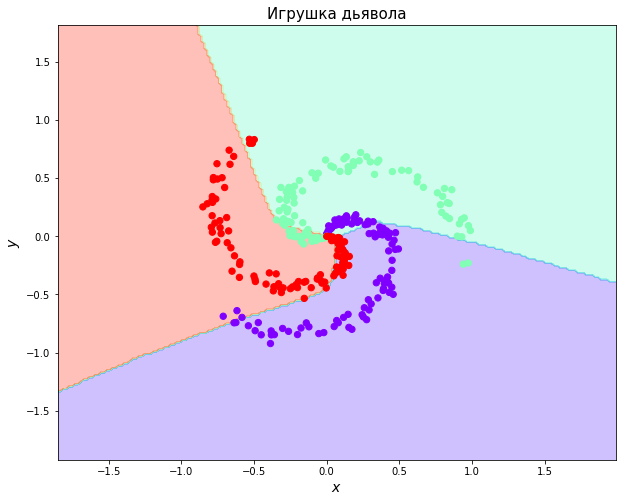

In [31]:
# Отрисовочная магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Качество не очень. Как же так, ведь мы использовали 100 нейронов? Разве их мало?

---

### Задача 2

Улучшите сеть (помните про вещи, которые можно менять (см. Компоненты нейросети)). Экспериментируйте, в этом **вся суть deep learning** (и в том, чтобы рано или поздно сетка научилась экспериментировать за Вас :)

In [0]:
# Ваш код здесь (можно (и нужно) создавать больше ячеек)

Несколько советов о том, как строить нейросети. Код выполнен на фреймворке Keras, но, кажется, он довольно интуитивно понятен.

* __Задача:__ Предсказать цену дома в $mil
* __Вход:__ 39 признаков этого дома

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([39]))
model.add(L.BatchNormalization())
model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros()))

model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros()))

model.add(L.Dense(1))

model.compile(optimizer='sgd', loss='mean_squared_error')

NameError: ignored

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([39]))
model.add(L.BatchNormalization()) #<- можно просто нормализовать входы 
model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros())) #<-инициализация нулями
model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros())) #<-
model.add(L.Dense(1)) #<- три линейных слоя подряд ни к чему не приведут

model.compile(optimizer='sgd', loss='mean_squared_error') 

NameError: ignored

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([39]))
model.add(L.Dense(128, activation='sigmoid'))
model.add(L.BatchNormalization())
model.add(L.Dense(128, activation='sigmoid'))
model.add(L.Dense(1))

model.compile(optimizer='sgd', loss='mean_squared_error')

* __Задача:__ Распознать рукописную цифру (0-9)
* __Вход:__ картинка 28 x 28 пикселей (ч/б)

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1))
model.add(L.Dense(10))
model.add(L.Activation('softmax'))
model.add(L.Dropout(0.1))
model.compile(optimizer='rmsprop', loss='mean_squared_error')

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1)) # < хороший, годный дропаут
model.add(L.Dense(10))
model.add(L.Activation('softmax'))
model.add(L.Dropout(0.1))
# ^ не стоит dropout-ить вероятности на выходе, рискуете получить бесконечный лосс
model.compile(optimizer='rmsprop', loss='mean_squared_error')
# ^ обучать классификацию по квадратичной ошибке можно, но... это безбожно

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1))
model.add(L.Dense(10))
model.add(L.Activation('softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [16]:
np.log(1.1**120)

11.437221576518994

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*